In [1]:
%run algoritmo_evolutivo.ipynb

from sklearn.metrics import mean_absolute_error, r2_score

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


import matplotlib.animation as animation
#import plotly_express as px
#import plotly.io as pio
#pio.renderers.default = 'notebook'

## Reading the data

In [5]:
emissions_df = pd.read_csv("MY2022_Fuel_Consumption_Ratings.csv", encoding='cp1252',
                 nrows=882, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14], index_col=False)

emissions_df = emissions_df[['Engine_Size','Cylinders','Fuel_Consumption_City','Fuel_Consumption_Hwy','Fuel_Consumption_Comb','CO2_Emissions','CO2_Rating','Smog_Rating']]

# take a look at the dataset
emissions_df.sample(4)

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,CO2_Emissions,CO2_Rating,Smog_Rating
689,1.6,4,8.6,6.7,7.7,181,7,7
588,2.5,4,10.1,7.3,8.8,207,6,5
56,3.0,6,12.5,9.7,11.2,262,4,5
497,2.4,4,10.8,9.1,10.0,238,5,5


## Separate features and target in different datasets

In [6]:
X =  emissions_df[['Engine_Size','Cylinders','Fuel_Consumption_City','Fuel_Consumption_Hwy']]
y =  emissions_df['CO2_Emissions']

# Crear población

In [46]:
poblacion = Poblacion(
                n_individuos = 50,
                n_variables  = 5,
                #limites_inf  = [0,-10,-10,-10,-10],
                #limites_sup  = [100,-50,50,50,50],
                verbose = False
            )

In [8]:
#poblacion.mostrar_individuos(n=3)

# Evaluar población

In [17]:
def y_predict(a,b,c,d,e):
  return  a + b*X['Engine_Size'] + c*X['Cylinders'] + d*X['Fuel_Consumption_City'] +  e*X['Fuel_Consumption_Hwy'] 

In [18]:
# Seleccion aleatoria del punto de partida
p = np.random.rand(5) * 95 

y_pred = y_predict(p[0], p[1], p[2], p[3], p[4])
y_pred

0      1120.035838
1      1493.471564
2      1165.525064
3      1186.735381
4      1179.472941
          ...     
877    1144.232318
878    1130.243227
879    1165.545671
880    1200.662650
881    1264.087528
Length: 882, dtype: float64

In [19]:
def funcion_objetivo(a,b,c,d,e):
    f = sum(np.power( y - y_predict(a,b,c,d,e), 2)) * (1/len(y))
    return(f)

In [20]:
funcion_objetivo(p[0],p[1],p[2],p[3],p[4])

1504714.8114259671

In [48]:
poblacion.optimizar(
    funcion_objetivo   = funcion_objetivo,
    optimizacion       = "minimizar",
    n_generaciones     = 2000,
    metodo_seleccion   = "tournament",
    elitismo           = 0.2,
    prob_mut           = 0.1,
    distribucion       = "uniforme",
    media_distribucion = 1,
    sd_distribucion    = 1,
    min_distribucion   = -1,
    max_distribucion   = 1,
    parada_temprana    = True,
    rondas_parada      = 10,
    tolerancia_parada  = 10**-18,
    verbose            = False
)

Algoritmo detenido en la generación 715 por falta cambio absoluto mínimo de 1e-18 durante 10 generaciones consecutivas.
-------------------------------------------
Optimización finalizada 2022-02-27 02:58:00
-------------------------------------------
Duración optimización: 36.441781759262085
Número de generaciones: 715
Valor óptimo de las variables: [19.884354766381108 -0.056585344369116 3.57101099755758 10.83888849551187
 8.911777377231505]
Valor función objetivo: 226.73278889077312



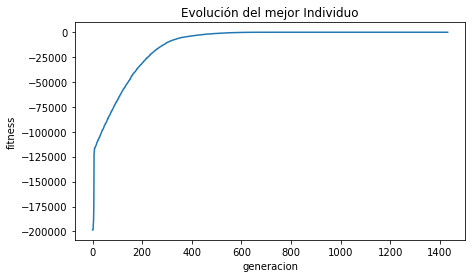

In [49]:
# Evolución de la optimización
fig, ax = plt.subplots(figsize=(7, 4))
poblacion.resultados_df.plot(x = "generacion",
                             y = "mejor_fitness",
                             ax= ax)
ax.set(title='Evolución del mejor Individuo', xlabel='generacion', ylabel='fitness')
ax.legend().set_visible(False)

****************************************************************
MSE: 7.0804316820693725
R2-score: 0.95


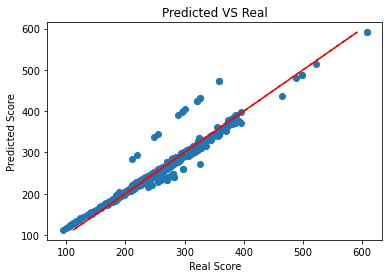

In [50]:
a,b,c,d,e = poblacion.valor_variables_optimo
prediction = y_predict(a,b,c,d,e)
print('*'*64)
print('MSE:', mean_absolute_error(y, prediction))
print("R2-score: %.2f" % r2_score(y, prediction))
#print('intecep:',stimator.intercept_,' Coeficient:',stimator.coef_)

plt.ylabel('Predicted Score')
plt.xlabel('Real Score')
plt.title('Predicted VS Real')
plt.scatter(y, prediction)
plt.plot(prediction, prediction,'r--')
plt.show()

In [32]:
print(a)

200
